In [1]:
# import required libraries
import pandas as pd
import requests
import re
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv files for all the languages
telugu = pd.read_csv('telugu_movies_1930_2025.csv')
tamil = pd.read_csv('tamil_movies_1930_2025.csv')
kannada = pd.read_csv('kannada_movies_1930_2025.csv')
malayalam = pd.read_csv('malayalam_movies_1928_2025.csv')

In [3]:
df = pd.concat([telugu,tamil,kannada,malayalam], ignore_index=True)

In [4]:
df.columns

Index(['Title', 'Director', 'Cast', 'Year', 'Language', 'url', 'production',
       'music', 'release', 'ref', 'Producer', 'Genre'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending = True)

Year              0
Language          0
url               0
Title           144
Cast            710
Director        831
ref           14847
music         14960
production    15386
release       19803
Genre         20416
Producer      21707
dtype: int64

In [6]:
df.shape

(23678, 12)

In [7]:
df = df[['Title','Cast','Director','Language','Year','url']]

In [8]:
# removing NAN from title
df = df[df['Title'].notna()]
# removing space from title
df = df[df['Title'].str.strip() != ""]
# reset index
df = df.reset_index(drop=True)

In [9]:
# removing the rows where the director column contains number
df = df[~df['Director'].astype(str).str.match(r'^\d+$')]

In [10]:
df

,Title,Cast,Director,Language,Year,url
1,Kalidas,"T. P. Rajalakshmi, P. G. Venkatesan, L. V. Prasad",H. M. Reddy,Telugu,1930s,https://en.wikipedia.org/wiki/List_of_Telugu_f...
3,Bhakta Prahlada,"Venkata Subbaiah Municipalle, Surabhi Kamalaba...",H. M. Reddy,Telugu,1930s,https://en.wikipedia.org/wiki/List_of_Telugu_f...
4,Sri Rama Paduka Pattabhishekam,"C. S. R. Anjaneyulu, Surabhi Kamalabai, Yadava...",Sarvottam Badami,Telugu,1930s,https://en.wikipedia.org/wiki/List_of_Telugu_f...
5,Sakunthala,"Yadavalli Suryanarayana, Surabhi Kamalabai",Sarvottam Badami,Telugu,1930s,https://en.wikipedia.org/wiki/List_of_Telugu_f...
7,Chintamani or Bilvamangal,"Master Baburao, Bhadracharyulu, Pulipati Venka...",Sadasiva Rao Kallakoori,Telugu,1930s,https://en.wikipedia.org/wiki/List_of_Telugu_f...
...,...,...,...,...,...,...
23529,Jagala,"Mareena Michael Kurisingal, Muraliram, Santhos...",Sreedev Kappur,Malayalam,2025.0,https://en.wikipedia.org/wiki/List_of_Malayala...
23530,Sea of Love - Kadalolam Sneham,"Dilsha Prasannan, Jibnu Jacob, Meera Nair",Sai Krishna,Malayalam,2025.0,https://en.wikipedia.org/wiki/List_of_Malayala...
23531,Hridayapoorvam,"Mohanlal, Malavika Mohanan, Sangeeth Prathap",Sathyan Anthikad,Malayalam,2025.0,https://en.wikipedia.org/wiki/List_of_Malayala...
23532,Maine Pyar Kiya,"Hridhu Haroon, Preity Mukhundhan",Fazil Faziludeen,Malayalam,2025.0,https://en.wikipedia.org/wiki/List_of_Malayala...


In [11]:
# uniform column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [12]:
# fixing year column [eg. 1930s,1 Jan 1960 etc] convert to int
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [13]:
# fix missing values in cast and director columns
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')

In [14]:
# remove duplicates
df.drop_duplicates(subset=['title', 'year', 'language'], keep='first', inplace=True)

In [15]:
# HTML includes [1], tags remove those
df = df.applymap(lambda x: re.sub(r'\[\d+\]|\xa0|\n', '', str(x)) if isinstance(x, str) else x)

In [16]:
# standardize language
df['language'] = df['language'].str.lower().str.capitalize()

In [17]:
# column types
df['year'] = df['year'].astype('Int64')

In [18]:
# trim white spaces in text columns
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()

In [19]:
# the first few rows of tables are headers or totals --reomve those rows
df = df[df['title'].notna() & (df['title'].str.len() > 1)]

In [20]:
# add decade column
df['decade'] = (df['year'] // 10 * 10).astype('Int64').astype(str) + 's'

In [21]:
df = df.reset_index(drop =True)

In [22]:
titles_with_brackets = df[df['title'].str.contains(r"\(.*?\)", na=False)]

In [23]:
print(len(titles_with_brackets))

395


In [24]:
#titles_with_brackets.to_csv("Titles_With_Brackets.csv", index=False)

In [25]:
titles_with_brackets

,title,cast,director,language,year,url,decade
20,Dhruva (Also Known as Dhruva Vijayamu),"C. Narayanaswamy, T. Venkateswarulu, M. Hemala...",C. Pullaiah,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s
25,Mayabazar (Also Known as Sasirekha Parinayam),"Yadavalli Nageswara Rao, Santha Kumari, S. P. ...",P. V. Das,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s
63,"Sri Venkateswara Mahatyam (Also Known as ""Bala...","C. S. R. Anjaneyulu, Santha Kumari, Rajeshwari...",P. Pullaiah,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s
203,Aada bratuku (1952 film),"K.Raghuramaiah , Sriranjani Jr , Krishna Kumar...",B.A.SubbaRao,Telugu,1952,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1950s
431,Indrajeet (Sati Sulochana),"N. T. Rama Rao, Anjali Devi",S. Rajinikanth,Telugu,1961,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1960s
...,...,...,...,...,...,...,...
22047,Puzha (2018 film),"Santhosh Keezhattoor, Vinod Prabhakar, Vaisakh...",Cochin Sitara,Malayalam,2018,https://en.wikipedia.org/wiki/List_of_Malayala...,2010s
22359,Nalpathiyonnu (41),"Biju Menon, Nimisha Sajayan, Saran Jith, Dhany...",Lal Jose,Malayalam,2019,https://en.wikipedia.org/wiki/List_of_Malayala...,2010s
22448,Transition (2020 film),"Akhil Prasannakumar, Megha Priya Sunil, Reghu ...",Krishnanunni Mangalath,Malayalam,2020,https://en.wikipedia.org/wiki/List_of_Malayala...,2020s
22749,19(1)(a),"Vijay Sethupathi, Indrajith Sukumaran, Nithya ...",Indhu V.S.,Malayalam,2022,https://en.wikipedia.org/wiki/List_of_Malayala...,2020s


In [26]:
# Define banned keywords
keywords = ["dub", "release", "also known", "tamil", "telugu", "kannada", "malayalam", "hindi","film"]

def clean_title(title):
    if pd.isna(title):
        return title

    # Find all brackets
    brackets = re.findall(r"\((.*?)\)", title)

    for b in brackets:
        b_lower = b.lower()

        # Check if it contains year or unwanted keywords
        if (any(kw in b_lower for kw in keywords) or 
            re.fullmatch(r"\d{4}", b.strip())):
            # Remove the whole bracketed part
            title = title.replace(f"({b})", "")
    
    return title.strip()

# Apply it
df['title'] = df['title'].apply(clean_title)


In [27]:
def remove_non_english_brackets(title):
    if pd.isna(title):
        return title
    # Match brackets that contain mostly non-ASCII characters
    return re.sub(r"\s*\(([^a-zA-Z0-9]*?)\)", "", title)

df['title'] = df['title'].apply(remove_non_english_brackets)

In [28]:
# remove duplicates
df.drop_duplicates(subset=['title', 'year', 'language'], keep='first', inplace=True)
df = df.reset_index(drop =True)

### Preprocessing actor names

In [46]:
# names containing a single string
df1 = df[(df['year']>= 2020) & (df['language'] == "Telugu")]
df2 = df[(df['year']>= 2024) & (df['language'] == "Kannada")]

In [47]:
# reset index
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

df1["clean_cast"] = None
df2["clean_cast"] = None

def split_concatenated_names(text):
    text = str(text).strip()
    
    # Step 1: Insert a space ONLY between first and second name
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text, count=1)
    
    # Step 2: Extract full names (1–3 capitalized words)
    names = re.findall(r'[A-Z][a-z]+(?:\s[A-Z][a-z]+)*', text)
    
    # Step 3: Join with commas
    return ", ".join(names)

df1['clean_cast'] = df1['cast'].apply(split_concatenated_names)

In [48]:
df1.head(10)

,title,cast,director,language,year,url,decade,clean_cast
0,Beautiful,Parth SuriNaina Ganguly,Agasthya Manju,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,Parth Suri Naina Ganguly
1,Oollalla Oollalla,NatarajNoorin ShereefAnkeeta R Maharanaa,Satya Prakash,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Nataraj Noorin Shereef, Ankeeta, Maharanaa"
2,Utthara,SreeramKarronya KatrynnAjay Ghosh,SR Thirupathi,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Sreeram Karronya Katrynn, Ajay Ghosh"
3,"Wife,i",Abhishek ReddySakshi SidiyaKavya,GSSP Kalyan,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Abhishek Reddy Sakshi Sidiya, Kavya"
4,Sarileru Neekevvaru,Mahesh BabuRashmika MandannaVijayashantiPrakas...,Anil Ravipudi,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Mahesh Babu Rashmika Mandanna, Vijayashanti, P..."
5,Ala Vaikunthapurramuloo,Allu ArjunPooja HegdeTabuJayaramSushanthNavdee...,Trivikram Srinivas,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Allu Arjun Pooja Hegde, Tabu, Jayaram, Sushant..."
6,Entha Manchivaadavuraa,Kalyan RamMehreen PirzadaNareshSarath BabuSuha...,Satish Vegesna,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Kalyan Ram Mehreen Pirzada, Naresh, Sarath Bab..."
7,Thagite Thandana,Adith ArunSapthagiriMadhunandanSimran Gupta,Srinath Badineni,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Adith Arun Sapthagiri, Madhunandan, Simran Gupta"
8,Disco Raja,Ravi TejaPayal RajputNabha NateshTanya HopeBob...,Vi Anand,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Ravi Teja Payal Rajput, Nabha Natesh, Tanya Ho..."
9,DubSmash,Pavan KrishnaSuprajaGetup Srinu,Keshav Depur,Telugu,2020,https://en.wikipedia.org/wiki/List_of_Telugu_f...,2020s,"Pavan Krishna Supraja, Getup Srinu"


In [49]:
def split_actors(text):
    # Ensure text is string
    text = str(text)
    # Regex: insert a comma before capital letters that are not at start and not after a space
    spaced = re.sub(r'(?<!^)(?=[A-Z])', ' ', text)
    # Now split by two or more spaces OR keep single spaces for names
    names = re.findall(r'[A-Z][a-z]+(?: [A-Z][a-z]+)*', spaced)
    return ", ".join(names)

df2['clean_cast'] = df2['cast'].apply(split_concatenated_names)

In [50]:
df2.head(10)

,title,cast,director,language,year,url,decade,clean_cast
0,Bisi-Bisi Ice-Cream,Aravind IyerSiri RavikumarGopalkrishna Deshpande,Arvind Sastry,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Aravind Iyer Siri Ravikumar, Gopalkrishna Desh..."
1,Jigar,Praveen TejVijayashree KalburgiBala RajwadiVin...,Suri Kunder,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Praveen Tej Vijayashree Kalburgi, Bala Rajwadi..."
2,Kaadaadi,Aditya ShashikumarLavannya SahukaraChandini Ta...,Satheesh Malempati,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Aditya Shashikumar Lavannya Sahukara, Chandini..."
3,Kaagada,AdityaAnkita JayaramBala RajwadiNeenasam Ashwa...,Ranjith,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Aditya Ankita Jayaram, Bala Rajwadi, Neenasam ..."
4,Kali Kudukaru,Lohith K. GopalRithyaa GowdaMahesh NagarajuSha...,Karan Savyasachi,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Lohith, Gopal Rithyaa Gowda, Mahesh Nagaraju, ..."
5,Back Bencherz,Jatin AryaAkashShashank SinghManya GoudaKunkum...,Rajashekhar,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Jatin Arya Akash, Shashank Singh, Manya Gouda,..."
6,Hejjaru,Bhagat AlvaShwetha Leonilla D SouzaGopalkrishn...,Harshapriya,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Bhagat Alva Shwetha Leonilla, Souza, Gopalkris..."
7,Hiranya,Raja VardanRihana ShiekDivya SureshHuli Karthik,Prawin Ayukth,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Raja Vardan Rihana Shiek, Divya Suresh, Huli K..."
8,Not Out,P. RavishankarAjay PrithviRachana InderGopal K...,M. Ambarish,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Ravishankar Ajay Prithvi, Rachana Inder, Gopal..."
9,Vidhyarthi Vidhyarthiniyare,Chandan ShettyAravind RaoBhavana AppuManasviAm...,Arun Amukta,Kannada,2024,https://en.wikipedia.org/wiki/List_of_Kannada_...,2020s,"Chandan Shetty Aravind Rao, Bhavana Appu, Mana..."


In [30]:
# Remove df1 and df2 rows from df
df_new = pd.concat([df, df1, df2]).drop_duplicates(keep=False).reset_index(drop=True)

In [31]:
def split_concatenated_names(text):
    spaced = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)
    names = re.findall(r'[A-Z][a-z]+(?:\s[A-Z][a-z]+)*', spaced)
    return names

In [32]:
def clean_pipe_separated_cast(text):
    text = text.strip("',\" ")
    return [actor.strip() for actor in text.split("|") if actor.strip()]

In [33]:
def clean_cast_column(df):
    cleaned_cast = []
    for raw in df['cast'].fillna(""):
        if "|" not in raw and "," not in raw and any(len(word) > 20 for word in raw.split()):
            names = split_concatenated_names(raw)
        else:
            names = clean_pipe_separated_cast(raw)
        cleaned_cast.append(", ".join(names))
    
    df['clean_cast'] = cleaned_cast
    return df

In [35]:
df_new = clean_cast_column(df_new)

In [36]:
df_new.head()

,title,cast,director,language,year,url,decade,clean_cast
0,Kalidas,"T. P. Rajalakshmi, P. G. Venkatesan, L. V. Prasad",H. M. Reddy,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"T. P. Rajalakshmi, P. G. Venkatesan, L. V. Prasad"
1,Bhakta Prahlada,"Venkata Subbaiah Municipalle, Surabhi Kamalaba...",H. M. Reddy,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Venkata Subbaiah Municipalle, Surabhi Kamalaba..."
2,Sri Rama Paduka Pattabhishekam,"C. S. R. Anjaneyulu, Surabhi Kamalabai, Yadava...",Sarvottam Badami,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"C. S. R. Anjaneyulu, Surabhi Kamalabai, Yadava..."
3,Sakunthala,"Yadavalli Suryanarayana, Surabhi Kamalabai",Sarvottam Badami,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Yadavalli Suryanarayana, Surabhi Kamalabai"
4,Chintamani or Bilvamangal,"Master Baburao, Bhadracharyulu, Pulipati Venka...",Sadasiva Rao Kallakoori,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Master Baburao, Bhadracharyulu, Pulipati Venka..."


In [51]:
df = pd.concat([df_new, df1, df2], ignore_index=True)

In [52]:
df.head()

,title,cast,director,language,year,url,decade,clean_cast
0,Kalidas,"T. P. Rajalakshmi, P. G. Venkatesan, L. V. Prasad",H. M. Reddy,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"T. P. Rajalakshmi, P. G. Venkatesan, L. V. Prasad"
1,Bhakta Prahlada,"Venkata Subbaiah Municipalle, Surabhi Kamalaba...",H. M. Reddy,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Venkata Subbaiah Municipalle, Surabhi Kamalaba..."
2,Sri Rama Paduka Pattabhishekam,"C. S. R. Anjaneyulu, Surabhi Kamalabai, Yadava...",Sarvottam Badami,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"C. S. R. Anjaneyulu, Surabhi Kamalabai, Yadava..."
3,Sakunthala,"Yadavalli Suryanarayana, Surabhi Kamalabai",Sarvottam Badami,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Yadavalli Suryanarayana, Surabhi Kamalabai"
4,Chintamani or Bilvamangal,"Master Baburao, Bhadracharyulu, Pulipati Venka...",Sadasiva Rao Kallakoori,Telugu,1930,https://en.wikipedia.org/wiki/List_of_Telugu_f...,1930s,"Master Baburao, Bhadracharyulu, Pulipati Venka..."


In [53]:
df.to_csv('South_Indian_Movies.csv',index = False)

## Exploratory Data Analysis

In [54]:
# Top 10 Directors by Number of Films
top_directors = df['director'].value_counts().head(11)
print(top_directors[1:11])

director
J. Sasikumar            119
I. V. Sasi              107
Rama Narayanan           97
Dasari Narayana Rao      85
K. Raghavendra Rao       85
Om Sai Prakash           76
K. S. Gopalakrishnan     76
Kodi Ramakrishna         71
S. P. Muthuraman         69
Joshiy                   69
Name: count, dtype: int64


In [55]:
# Most Active Years by Language
active_years = df.groupby(['language', 'year']).size().reset_index(name='Count')
most_active_years = active_years.sort_values(['language', 'Count'], ascending=[True, False]).drop_duplicates('language')
print(most_active_years)

      language  year  Count
80     Kannada  2018    222
166  Malayalam  2022    256
262      Tamil  2023    255
350     Telugu  2024    254


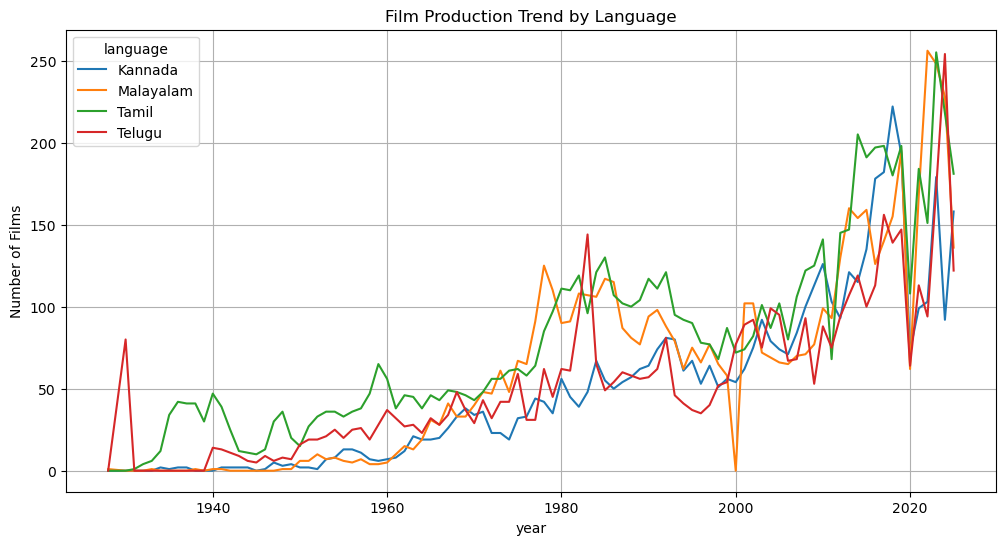

In [56]:
# Language-wise Film Production Trend
import matplotlib.pyplot as plt
trend = df.groupby(['year', 'language']).size().unstack().fillna(0)
trend.plot(kind='line', figsize=(12,6), title='Film Production Trend by Language')
plt.xlabel("year")
plt.ylabel("Number of Films")
plt.grid(True)
plt.show()